In [16]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_one = "Resources/yelp_clean.csv"

file_one_df = pd.read_csv(file_one)

clean_1_df = file_one_df[['restaurant', 'cuisine', 'price']]

clean_1_dff = clean_1_df.dropna(how='any')

clean_2_df = clean_1_df.loc[(clean_1_df["price"] == "$") | (
                             clean_1_df["price"] == "$$") | (
                             clean_1_df["price"] == "$$$") | (
                             clean_1_df["price"] == "$$$$") , :]

clean_2_df = clean_1_df.loc[(clean_1_df["cuisine"] != "Other"), :]

clean_2_df["price"] = clean_2_df["price"].replace(
    {"$": "$1-10",
     "$$": "$11-30",
     "$$$": "$31-60",
     "$$$$": "$61+"})
                            
clean_3_df = pd.crosstab(clean_2_df['price'],
                         clean_2_df['cuisine']#,
                         #margins = True,
                         #margins_name = "Total",
                         #normalize='index'
                        )
                            

clean_3_df.head()


C:\Users\skim2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


cuisine,American,Chinese,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Thai,Vietnamese
price,,,,,,,,,,
$1-10,21,93,14,4,12,2,6,106,7,57
$11-30,117,63,40,83,148,37,27,55,67,28
$31-60,43,0,2,23,14,0,2,1,1,1
$61+,14,1,0,2,15,0,0,1,0,0


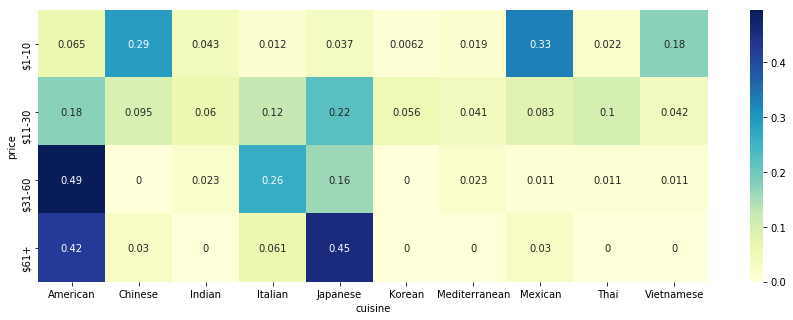

In [29]:
clean_4_df = pd.crosstab(clean_2_df['price'],
                         clean_2_df['cuisine'],
                         normalize='index'
                        )
                            
plt.figure(figsize=(15,5))
ax = sns.heatmap(clean_4_df,cmap="YlGnBu", annot=True, cbar=True)
plt.savefig("Images/ContingencyTable.png")


In [18]:
f_obs = np.array([clean_3_df.iloc[0][0:10].values,
                  clean_3_df.iloc[1][0:10].values,
                  clean_3_df.iloc[2][0:10].values,
                  clean_3_df.iloc[3][0:10].values,
                 ])
f_obs

array([[ 21,  93,  14,   4,  12,   2,   6, 106,   7,  57],
       [117,  63,  40,  83, 148,  37,  27,  55,  67,  28],
       [ 43,   0,   2,  23,  14,   0,   2,   1,   1,   1],
       [ 14,   1,   0,   2,  15,   0,   0,   1,   0,   0]], dtype=int64)

In [22]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(490.91064435729504, 1.1593928466742333e-86, 27)